In [ ]:
!pip install --user yellowbrick
!pip install --user seaborn

In [3]:
import numpy as np
import pandas as pd 
from minio import Minio
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import os
import io


In [12]:
minio_client = Minio(
    "127.0.0.1:8000",
    access_key="admin",
    secret_key="password",
    secure=False  
)


data_object = minio_client.get_object('csv', 'kesehatan/heart_attack_prediction_dataset.csv')

In [13]:
pd.set_option('display.max_columns',None)
df = pd.read_csv(data_object)
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [18]:
cluster_features = df[['Age','Cholesterol','Heart Rate','Diabetes','Smoking','Family History','Obesity','Alcohol Consumption','Stress Level','BMI']]
kmean = KMeans(random_state=3)
y_kmean = kmean.fit_predict(cluster_features)

cluster = KMeans(n_clusters=3).fit(cluster_features)
cluster_features['Labels'] = cluster.labels_

C:\Users\andar\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andar\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andar\AppData\Local\Temp\ipykernel_16760\3179620173.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_features['Labels'] = cluster.labels_


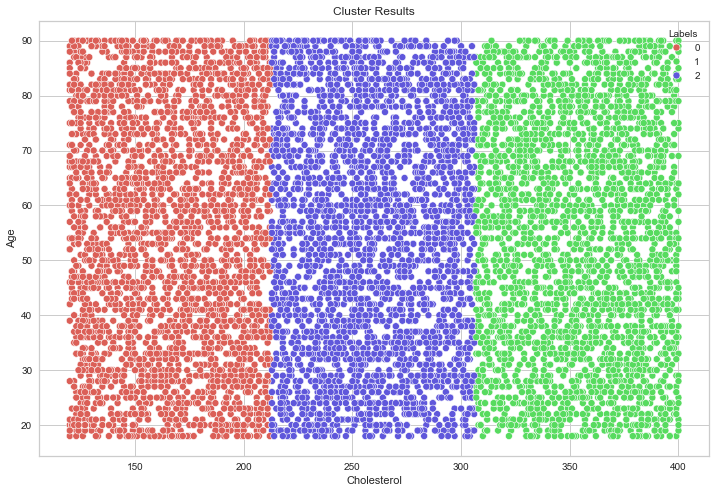

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=cluster_features, x='Cholesterol', y='Age', hue=cluster_features['Labels'],
                palette=sns.color_palette('hls',3))
plt.title('Cluster Results')
plt.show()